# Import and todos


TODOS
- rewrite optimization functions, to pass the function and its derivatives as arguments [OK]
- reset default values for x0 to 0 [OK]
- rewrite showtrajs in single function (not priority)
- have a warning to tell if parameter alpha is too large [HARD CODE max 1000 iterations and signal error]
- entirely replace current implementation of LRGD with its rank r version
- do some testing on large synthetic regression problems OK
- change synthetic data to have LR structure OK
- Do LS with L1 norm regularizer
- Do with logistic regression
- make a verbose option for the optimization function (where they tell results in nice manner)
- Make sure LRGD and GD work exactly the same for full rank its OK just a tiny 2 iterations difference
- Change quadratic to increase L >  1/2 \theta H \theta 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#from pylab import figure, cm
#from adjustText import adjust_text

from visuals import show_trajs
from optim import GD
from optim import LRGD
from visuals import plot_convergence
from visuals import plot_convergence2
import matplotlib.pylab as pl

np.random.seed(0)

# 2D example (visual)

## Function definition

In [2]:
H = np.array([[1,0],[0,1/3]])

def f(z):
    """The function to minimize"""
    return 1/2*(z.T).dot(H).dot(z)

def df(z):
    """Function gradient"""
    return H.dot(z)

def deltaf(z,u):
    """
    Directional gradient in direction u
    Returns : <df(z)|u> with u normalized.    
    """
    return H.dot(z).dot(u)/np.linalg.norm(u)

print("f(1,1) = 3*1^2+1^2 = ", f(np.array([1,1])))
print("df(1,1) = (6x,2y) = (6,2) = ", df(np.array([1,1])))
print("deltaf((1,1),(0,1)) = 2y = ", deltaf(np.array([1,1]), np.array([0,1])))

f(1,1) = 3*1^2+1^2 =  0.6666666666666666
df(1,1) = (6x,2y) = (6,2) =  [1.         0.33333333]
deltaf((1,1),(0,1)) = 2y =  0.3333333333333333


## Classic Gradient Descent

oracle calls : 36
number of iterations : 19


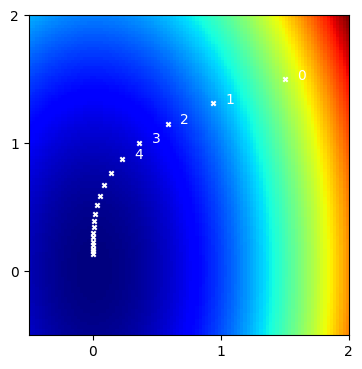

In [13]:
H = np.array([[3,0],[0,1]])
alpha = 1/8 # 1/2 would be optimal 
epsilon = 0.02

ZGD, CGD = GD(f,df,z0 = [1.5,1.5], epsilon = epsilon, alpha = alpha) ## 1/6 would be optimal
print("oracle calls :", np.sum(CGD))
print("number of iterations :", len(ZGD))
show_trajs(ZGD,f=f,title = "", colorbar = False)

oracle calls :  71
number of iterations :  67


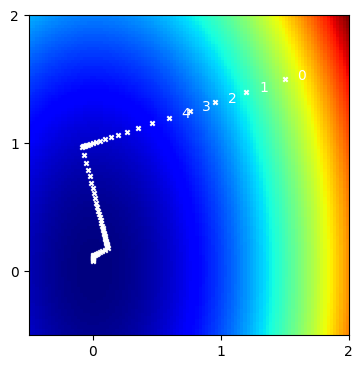

In [9]:
ZLRGD,CLRGD = LRGD(f, deltaf,z0 = [1.5,1.5], epsilon=0.01, alpha = alpha, rank =1)
print("oracle calls : ", np.sum(CLRGD))
print("number of iterations : ", len(ZLRGD))
show_trajs(ZLRGD,f=f,title = "",colorbar = False)

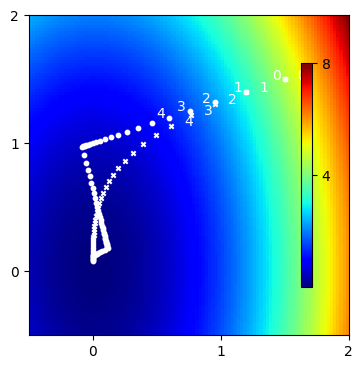

In [10]:
show_trajs(ZGD,ZLRGD,f=f,title = "",colorbar = True)

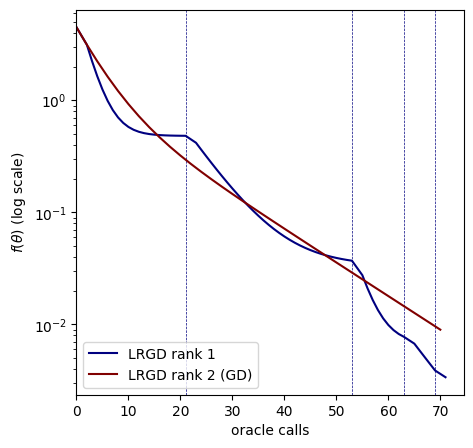

In [11]:
plot_convergence([ZLRGD, ZGD],[CLRGD, CGD],f, verticals =[True, False],labels =["LRGD rank 1", "LRGD rank 2 (GD)"])

# Quadratic function in higher dimension

In [32]:
H = np.array(
    [[1,0,0,0],
     [0,1/10,0,0],
     [0,0,1/10,0],
     [0,0,0,1/10]])

p=4
alpha = 1/4
epsilon = 0.001
z0 = np.ones(p)

In [33]:
ZGD,CGD = GD(f, df, z0 = z0,alpha = alpha, epsilon=epsilon)
print("oracle calls : ", np.sum(CGD))

oracle calls :  272


In [34]:
ZLRGD1,CLRGD1 = LRGD(f, deltaf, z0 = z0,alpha = alpha, epsilon=epsilon, mixed=0, rank=1)
print("oracle calls : ", np.sum(CLRGD1))

oracle calls :  95


In [35]:
ZLRGD2,CLRGD2 = LRGD(f, deltaf, z0 = z0,alpha = alpha, epsilon=epsilon, mixed=0, rank=2)
print("oracle calls : ", np.sum(CLRGD2))

oracle calls :  146


In [36]:
ZLRGD3,CLRGD3 = LRGD(f, deltaf, z0 = z0,alpha = alpha, epsilon=epsilon, mixed=0, rank=3)
print("oracle calls : ", np.sum(CLRGD3))

oracle calls :  214


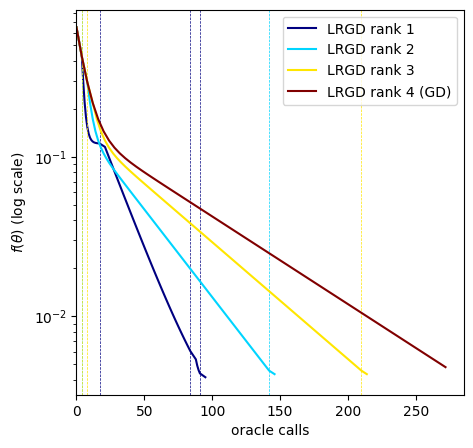

In [37]:
plot_convergence([ZLRGD1, ZLRGD2, ZLRGD3, ZGD],[CLRGD1, CLRGD2, CLRGD3, CGD],f, verticals =[True, True, True, False],labels =["LRGD rank 1","LRGD rank 2","LRGD rank 3", "LRGD rank 4 (GD)"],savename="dimension4rank1.pdf")

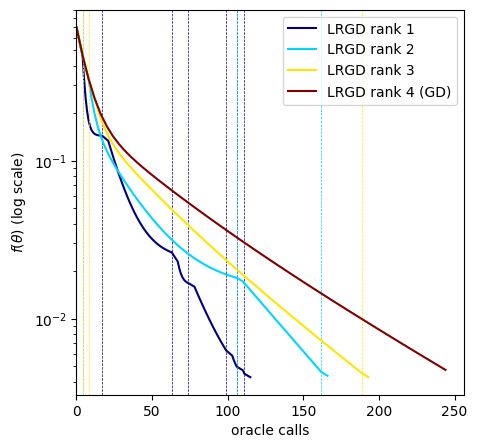

In [39]:
H = np.array(
    [[1,0,0,0],
     [0,1/5,0,0],
     [0,0,1/10,0],
     [0,0,0,1/10]])

p=4
alpha = 1/4
epsilon = 0.001
z0 = np.ones(p)

ZGD,CGD = GD(f, df, z0 = z0,alpha = alpha, epsilon=epsilon)
ZLRGD1,CLRGD1 = LRGD(f, deltaf, z0 = z0,alpha = alpha, epsilon=epsilon, rank=1)
ZLRGD2,CLRGD2 = LRGD(f, deltaf, z0 = z0,alpha = alpha, epsilon=epsilon, rank=2)
ZLRGD3,CLRGD3 = LRGD(f, deltaf, z0 = z0,alpha = alpha, epsilon=epsilon, rank=3)
plot_convergence([ZLRGD1, ZLRGD2, ZLRGD3, ZGD],[CLRGD1, CLRGD2, CLRGD3, CGD],f, verticals =[True, True, True, False],labels =["LRGD rank 1","LRGD rank 2","LRGD rank 3", "LRGD rank 4 (GD)"],savename="dimension4rank2.pdf")

In [28]:
from tqdm import trange

def experiment(f, deltaf, z0, alpha, epsilon, ranks, verticals = None, xmax=None, ymin = None, savename=None, colors=None):
    ZLRGDs = []
    CLRGDs = []
    for i in trange(len(ranks)):
        ZLRGD,CLRGD = LRGD(f, deltaf, z0 = z0,alpha = alpha, epsilon=epsilon, rank=ranks[i])
        ZLRGDs.append(ZLRGD)
        CLRGDs.append(CLRGD)
    labels = ["LRGD rank "+ str(r) for r in ranks]
    plot_convergence(ZLRGDs, CLRGDs, f, verticals = verticals,labels=labels,colors=colors, xmax=xmax,ymin=ymin, savename=savename)
    
    
    indices = ["alpha"]
    alphas = [alpha]
    columns = labels
    data = np.zeros(shape = (len(indices),len(columns)))

    for j in range(len(columns)): 
        for i in range(len(indices)):
            data[0,j] = np.sum(CLRGDs[j])
    results = pd.DataFrame(columns = columns,index = indices, data = data).astype(int)
    print(results)

def experiment2(f, df, deltaf, z0, alpha, epsilon, ranks, verticals= None, xmax=None, ymin = None, colors=None, savename=None):
    ZLRGDs = []
    CLRGDs = []
    for i in trange(len(ranks)):
        ZLRGD,CLRGD = LRGD(f, deltaf, z0 = z0,alpha = alpha, epsilon=epsilon, rank=ranks[i])
        ZLRGDs.append(ZLRGD)
        CLRGDs.append(CLRGD)
    labels = ["LRGD rank "+ str(r) for r in ranks]
    plot_convergence2(ZLRGDs, CLRGDs, f, df, verticals = verticals,labels=labels,colors=colors, xmax=xmax,ymin=ymin, savename=savename)
    
    
    indices = ["alpha"]
    alphas = [alpha]
    columns = labels
    data = np.zeros(shape = (len(indices),len(columns)))

    for j in range(len(columns)): 
        for i in range(len(indices)):
            data[0,j] = np.sum(CLRGDs[j])
    results = pd.DataFrame(columns = columns,index = indices, data = data).astype(int)
    print(results)

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  3.58it/s]


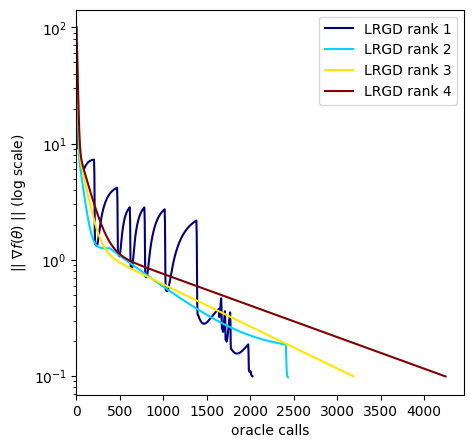

       LRGD rank 1  LRGD rank 2  LRGD rank 3  LRGD rank 4
alpha         2024         2432         3187         4244


In [30]:
experiment2(f,df, deltaf, z0 = z0,alpha = alpha, epsilon=0.01, ranks=[1,2,3,4],savename="dimension4rank2gradients.pdf")

# Large scale quadratic experiments (rank = 1)

Note particular influence of low learning rate on success of LRGD

In [31]:
### NEED TO ADAPT LEARNING RATE
### alpha = 1/L where L is smoothness of gradient. i.e. max singular value


H1 = np.array([[1,0],
               [0,1]])

H2 = np.array([[1,0],
               [0,0.1]])

H3 = np.array([[1,0],
                [0,0.01]])

H4 = np.array([[1,0],
                [0,0.001]])


Hs = [H1,H2,H3,H4]

alphas = np.array([1,1, 1, 1])/2 #/2 is optimal

z0s = np.array([[1,0],
                [0.87,0.5], #sin(30)
                [0.71,0.71],#à peu près 1/sqrt(2)
                [0.5,0.87],
                [0,1]]) 

columns = [str(el) for el in Hs]
indices = [str(el) for el in z0s]
data_lrgd = np.zeros(shape = (len(indices),len(columns)))
data_gd = np.zeros(shape = (len(indices),len(columns)))
#zdata = {}

for j in range(len(Hs)): 
    for i in range(len(z0s)):
        H = Hs[j]
        ZLRGD,C = LRGD(f, deltaf,z0 = z0s[i],epsilon=0.0000001, alpha = alphas[j])
        data_lrgd[i,j] = np.sum(C)
        ZGD,C = GD(f, df,z0 = z0s[i],epsilon=0.0000001, alpha = alphas[j])
        data_gd[i,j] = np.sum(C)
        #zdata[str(i)+","+str(j)]=ZLRGD.copy()

results_lrgd = pd.DataFrame(columns = columns,index = indices, data = data_lrgd)
results_gd = pd.DataFrame(columns = columns,index = indices, data = data_gd)

results_lrgd

,[[1 0]\n [0 1]],[[1. 0. ]\n [0. 0.1]],[[1. 0. ]\n [0. 0.01]],[[1. 0. ]\n [0. 0.001]]
[1. 0.],16.0,16.0,16.0,16.0
[0.87 0.5 ],16.0,152.0,634.0,1309.0
[0.71 0.71],16.0,193.0,645.0,1940.0
[0.5 0.87],16.0,248.0,686.0,2515.0
[0. 1.],16.0,117.0,694.0,2307.0


In [32]:
results_gd

,[[1 0]\n [0 1]],[[1. 0. ]\n [0. 0.1]],[[1. 0. ]\n [0. 0.01]],[[1. 0. ]\n [0. 0.001]]
[1. 0.],24.0,24.0,24.0,24.0
[0.87 0.5 ],24.0,198.0,1102.0,1834.0
[0.71 0.71],24.0,212.0,1242.0,3236.0
[0.5 0.87],24.0,220.0,1324.0,4048.0
[0. 1.],24.0,226.0,1380.0,4606.0


# OLS Regression

### Synthetic setting

Regression :  Y[i] = X[i,:]\beta + \sigma N(0,1)


In [43]:
 #### PROBLEM DEFINITION ####
n = 50 # number of samples 
p = 10 # dimension of problem
sigma = 0.1 # noise

np.random.seed(0)
X = np.random.normal(size = (n,p)) # signal
beta = np.ones(shape = (p)) # signal - could be replaced  with np.random.normal(size = (p))
Y = X.dot(beta) + sigma*np.random.normal(size = (n))

 #### CLOSED FORM ####
betah, residuals, rank, s = np.linalg.lstsq(X,Y)

## Relevant learning rate 
alpha = 1/4 ## 1/2L relevant cause the norm of hessian is upper bound on biggest singular value
L = np.linalg.norm(2*X.T.dot(X),ord='nuc')

## Define the corresponding functions
def f(beta):
    """f(beta) = ||Xbeta-Y||^2"""
    return (1/L)*np.linalg.norm(X.dot(beta)-Y)**2

def df(beta):
    return (1/L)*2*X.T.dot(X.dot(beta)-Y)

def deltaf(z,u):
    """returns directional derivative of f along u"""
    return (1/L)*df(z).dot(u)/np.linalg.norm(u)

C:\Users\romai\AppData\Local\Temp\ipykernel_2000\919873328.py:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  betah, residuals, rank, s = np.linalg.lstsq(X,Y)


In [44]:
print("Objective at starting point: ", f(np.zeros(p)))
print("Objective at real beta:      ", f(beta))
print("Objective at optimum:        ", f(betah))

Objective at starting point:  0.5397249823538895
Objective at real beta:       0.0006064921278770828
Objective at optimum:         0.0004687316164798095


In [45]:
ZGD, CGD = GD(f, df, epsilon = 0.1, alpha = alpha, z0 = np.zeros(p)) ## 1/6 would be optimal
np.sum(CGD)

40

In [46]:
ZLRGD, CLRGD = LRGD(f, deltaf, epsilon=0.1, alpha = alpha, z0 = np.zeros(p), rank=p)
np.sum(CLRGD)

100

In [51]:
columns = ["rank 1", "rank 2", "rank 3", "rank 4", "rank 5", "rank 6","rank 10","rank p (= GD)"]
ranks = [1,2,3,4,5,6,10,p]
indices = ["1/2L", "1/4L", "1/8L"]
alphas=[alpha, alpha/2,alpha/4]
data = np.zeros(shape = (len(indices),len(columns)))

for j in range(len(columns)): 
    for i in range(len(indices)):
        ZLRGD,C = LRGD(f, deltaf,z0 = np.zeros(p),epsilon=0.0000001, alpha = alphas[i], rank=ranks[j])
        data[i,j] = np.sum(C)

results = pd.DataFrame(columns = columns,index = indices, data = data).astype(int)
results

,rank 1,rank 2,rank 3,rank 4,rank 5,rank 6,rank 10,rank p (= GD)
1/2L,3571,7132,10690,14246,17800,21352,35540,35540
1/4L,7113,14236,21346,28454,35560,42664,71060,71060
1/8L,14197,28442,42655,56866,71075,85282,142090,142090


In [38]:
print(results.to_latex())

\begin{tabular}{lrrrrrrrr}
\toprule
{} &  rank 1 &  rank 2 &  rank 3 &  rank 4 &  rank 5 &  rank 6 &  rank 10 &  rank p (= GD) \\
\midrule
1/2L &      10 &      20 &      30 &      40 &      50 &      60 &      100 &            100 \\
1/4L &      10 &      20 &      30 &      40 &      50 &      60 &      100 &            100 \\
1/8L &      10 &      20 &      30 &      40 &      50 &      60 &      100 &            100 \\
\bottomrule
\end{tabular}



C:\Users\romai\AppData\Local\Temp\ipykernel_2000\3863709051.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(results.to_latex())


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 44.45it/s]


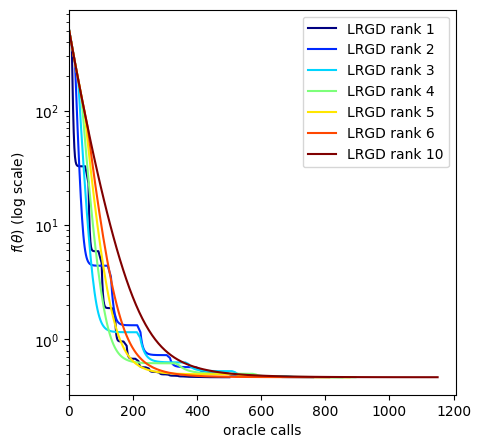

       LRGD rank 1  LRGD rank 2  LRGD rank 3  LRGD rank 4  LRGD rank 5  \
alpha          501          762          853          894          875   

       LRGD rank 6  LRGD rank 10  
alpha          812          1150  


In [49]:
experiment(f,deltaf, z0 = np.zeros(p),alpha = alpha, epsilon=0.01, ranks=[1,2,3,4,5,6,10], colors = pl.cm.jet(np.linspace(0,1,7)),savename="regressionfullrank.pdf")

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 46.84it/s]


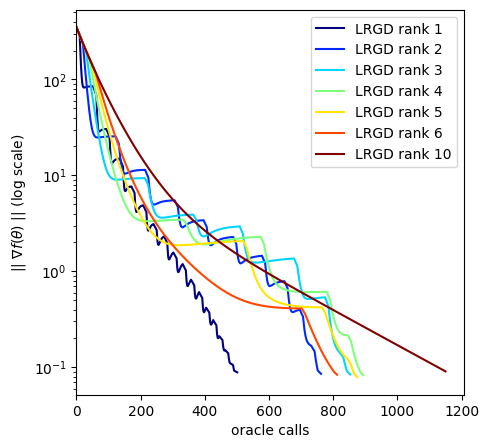

       LRGD rank 1  LRGD rank 2  LRGD rank 3  LRGD rank 4  LRGD rank 5  \
alpha          501          762          853          894          875   

       LRGD rank 6  LRGD rank 10  
alpha          812          1150  


In [50]:
experiment2(f,df,deltaf, z0 = np.zeros(p),alpha = alpha, epsilon=0.01, ranks=[1,2,3,4,5,6,10], colors = pl.cm.jet(np.linspace(0,1,7)))

## Planted structure
-> regularize

In [51]:
## PLANTED STRUCTURE

n=50
p=10
sigmaX, sigmaY = 0.01, 0.1 #std of in-sample noise - strange reaction to higher sigmaX
r=2
np.random.seed(0)
X = 1/np.sqrt(r)*np.random.normal(size = (n,r)).dot(np.random.normal(size=(r,p))) + sigmaX*np.random.normal(size=(n,p)) 
beta = np.ones(shape = (p)) #replace with np.random.normal(size = (p))
eps = np.random.normal(size = (n))
Y = X.dot(beta) + sigmaY*eps

## Relevant learning rate 
alpha = 1/(2*np.linalg.norm(2*X.T.dot(X))) ## 1/2L relevant cause the norm of hessian is upper bound on biggest singular value

## Define the corresponding functions
def f(beta):
    """f(beta) = ||Xbeta-Y||^2"""
    return np.linalg.norm(X.dot(beta)-Y)**2

def df(beta):
    return 2*X.T.dot(X.dot(beta)-Y)

def deltaf(z,u):
    """returns directional derivative of f along u"""
    return df(z).dot(u)/np.linalg.norm(u)

In [52]:
ZLRGD,C = LRGD(f, deltaf, z0 = np.zeros(p),epsilon=0.1, alpha = alpha, rank=2)

In [53]:
columns = ["rank 1", "rank 2", "rank 3", "rank 4", "rank 5", "rank 6","rank p (= GD)"]
ranks = [1,2,3,4,5,6,p]
indices = ["1/2L", "1/4L", "1/8L"]
alphas=[alpha, alpha/2,alpha/4]
data = np.zeros(shape = (len(indices),len(columns)))

for j in trange(len(columns)): 
    for i in range(len(indices)):
        ZLRGD,C = LRGD(f, deltaf, z0 = np.zeros(p),epsilon=0.1, alpha = alphas[i], rank=ranks[j])
        data[i,j] = np.sum(C)

results = pd.DataFrame(columns = columns,index = indices, data = data).astype(int)
results

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 17.32it/s]


,rank 1,rank 2,rank 3,rank 4,rank 5,rank 6,rank p (= GD)
1/2L,285,162,235,306,375,442,690
1/4L,476,302,445,586,725,862,1390
1/8L,858,582,868,1150,1430,1708,2800


In [54]:
print(results.to_latex())

\begin{tabular}{lrrrrrrr}
\toprule
{} &  rank 1 &  rank 2 &  rank 3 &  rank 4 &  rank 5 &  rank 6 &  rank p (= GD) \\
\midrule
1/2L &     285 &     162 &     235 &     306 &     375 &     442 &            690 \\
1/4L &     476 &     302 &     445 &     586 &     725 &     862 &           1390 \\
1/8L &     858 &     582 &     868 &    1150 &    1430 &    1708 &           2800 \\
\bottomrule
\end{tabular}



C:\Users\romai\AppData\Local\Temp\ipykernel_3400\3863709051.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(results.to_latex())


100%|███████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 103.85it/s]


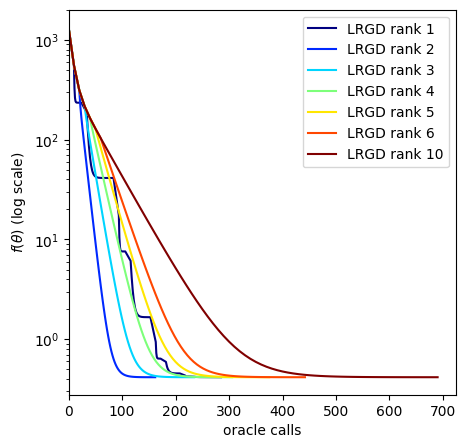

       LRGD rank 1  LRGD rank 2  LRGD rank 3  LRGD rank 4  LRGD rank 5  \
alpha          285          162          235          306          375   

       LRGD rank 6  LRGD rank 10  
alpha          442           690  


In [56]:
experiment(f,deltaf, z0 = np.zeros(p),alpha = alpha, epsilon=0.1, ranks=[1,2,3,4,5,6,p],savename="regressionplanted.pdf")

100%|███████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 100.56it/s]


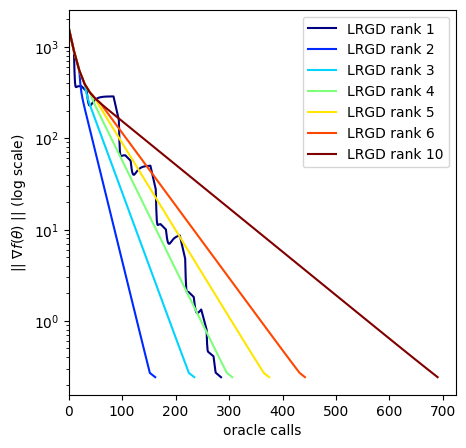

       LRGD rank 1  LRGD rank 2  LRGD rank 3  LRGD rank 4  LRGD rank 5  \
alpha          285          162          235          306          375   

       LRGD rank 6  LRGD rank 10  
alpha          442           690  


In [106]:
experiment2(f,df,deltaf, z0 = np.zeros(p),alpha = alpha, epsilon=0.1, ranks=[1,2,3,4,5,6,p])

## Least squares with L1 regularizer
 This cannot work in general (when the optimum contains 0 values) cause then the function is not bounded by a quadratic around optimum. Therefore we loose the assumptions that are required for GD with constant step size to work. 

In [28]:
n=10 
p=2
sigma = 0.1
r=4
X = 1/np.sqrt(r)*np.random.normal(size = (n,r)).dot(np.random.normal(size=(r,p))) 
beta = np.ones(shape = (p)) #replace with np.random.normal(size = (p))
#beta[0]=0 ### THIS MAKES PROGRAM FAIL !!!!!
Y = X.dot(beta) + sigma*np.random.normal(size = (n))

## Relevant learning rate 
alpha = 1/(2*np.linalg.norm(2*X.T.dot(X))) ## 1/2L relevant cause the norm of hessian is upper bound on biggest singular value

## Define the corresponding functions
def f(beta):
    """f(beta) = ||Xbeta-Y||^2+||Y||_1"""
    return np.linalg.norm(X.dot(beta)-Y)**2+np.linalg.norm(beta, ord=1)

def df(beta):
    return 2*X.T.dot(X.dot(beta)-Y)+ np.sign(beta)

def deltaf(z,u):
    """returns directional derivative of f along u"""
    return df(z).dot(u)/np.linalg.norm(u)

## Logistic regression (L2 regularized)
https://www.di.ens.fr/appstat/spring-2019/lecture_notes/Lesson5_ConvexAnalysis.pdf

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#from pylab import figure, cm
#from adjustText import adjust_text

from visuals import show_trajs
from optim import GD
from optim import LRGD
from visuals import plot_convergence

In [58]:
#### Useful
def logistic_function(Y):
    return 1/(1+np.exp(-Y))

def logistic_loss(u,y):
    return y*np.log(1+np.exp(-u))+(1-y)*np.log(1+np.exp(u))

### setting
n=20
p=20
sigmaX, sigmaY = 0.1, 0.1 #std of in-sample noise
r=4
np.random.seed(1)
X = 1/np.sqrt(r)*np.random.normal(size = (n,r)).dot(np.random.normal(size=(r,p))) + sigmaX*np.random.normal(size=(n,p)) 
beta = np.ones(shape = (p)) #replace with np.random.normal(size = (p))
Y = np.random.uniform(size=(n))< logistic_function(X.dot(beta))

## Relevant learning rate 
alpha = 1/(2*np.linalg.norm(2*X.T.dot(X)))/2 ## 1/2L relevant cause the norm of hessian is upper bound on biggest singular value

## Define the corresponding functions
def f(beta):
    """f(beta) = 1/n sum_i \ell(xi.dot(beta),y_i)"""
    return np.sum([logistic_loss(X[i].dot(beta),Y[i]) for i in range(len(X))])
    
def df(beta):
    return -X.T.dot(Y - logistic_function(X.dot(beta)))

def deltaf(z,u):
    """returns directional derivative of f along u"""
    return df(z).dot(u)/np.linalg.norm(u)

alpha=0.05

Zeroth-order optimisation
- Note that $||\nabla^2 f||\leq L$
- Consequently $|\delta_{uu}^2f(x)| <L$
- And thus $|\delta_u f(x) - \frac{f(x+tu)-f(x)}{t}|<\frac{t}{2}L$
- Giving a nice way to have a fast directional derivative oracle (that does not scale with $p$)

https://arxiv.org/pdf/1312.2139.pdf

In [59]:
columns = ["rank 1", "rank 2", "rank 3", "rank 4", "rank 5", "rank 6", "rank p (GD)"]
ranks = [1,2,3,4,5,6,p]
indices = ["0.1", "0.05", "0.01"]
alphas=[0.1,0.05,0.01]
data = np.zeros(shape = (len(indices),len(columns)))

for j in range(len(columns)): 
    for i in range(len(indices)):
        ZLRGD,C = LRGD(f, deltaf, z0 = np.zeros(p),epsilon=0.1, alpha = alphas[i], rank=ranks[j])
        data[i,j] = np.sum(C)

results = pd.DataFrame(columns = columns,index = indices, data = data).astype(int)
results

,rank 1,rank 2,rank 3,rank 4,rank 5,rank 6,rank p (GD)
0.1,3667,1050,842,940,1105,1266,3580
0.05,3230,1926,1539,1804,1930,2302,7120
0.01,3001,7710,7799,8132,12535,10954,35460


In [60]:
print(results.to_latex())

\begin{tabular}{lrrrrrrr}
\toprule
{} &  rank 1 &  rank 2 &  rank 3 &  rank 4 &  rank 5 &  rank 6 &  rank p (GD) \\
\midrule
0.1  &    3667 &    1050 &     842 &     940 &    1105 &    1266 &         3580 \\
0.05 &    3230 &    1926 &    1539 &    1804 &    1930 &    2302 &         7120 \\
0.01 &    3001 &    7710 &    7799 &    8132 &   12535 &   10954 &        35460 \\
\bottomrule
\end{tabular}



C:\Users\romai\AppData\Local\Temp\ipykernel_3400\3863709051.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(results.to_latex())


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 11.32it/s]


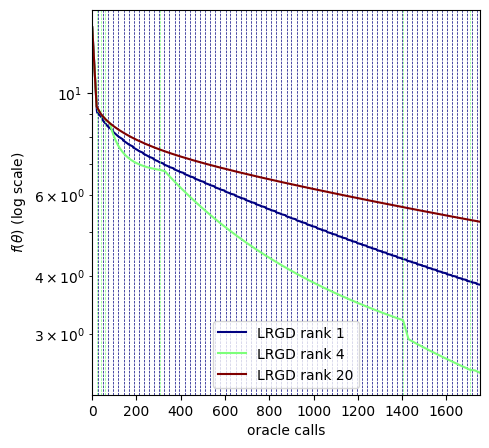

       LRGD rank 1  LRGD rank 4  LRGD rank 20
alpha         3230         1804          7120


In [63]:
experiment(f,deltaf, z0 = np.zeros(p),alpha = alpha, epsilon=0.1, ranks=[1,4,p],xmax=1750, verticals = [True, True,False],savename="syntheticlogisticrank4.pdf")

# UCI dataset logistic 
multinomial logistic would be better

https://atmamani.github.io/projects/ml/mnist-digits-classification-using-logistic-regression-scikit-learn/

In [64]:
from sklearn.datasets import load_digits

In [65]:
digits = load_digits()
(digits.data.shape, digits.target.shape, digits.images.shape)

((1797, 64), (1797,), (1797, 8, 8))

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, 
                                                    digits.target,
                                                   test_size=0.25,
                                                   random_state=0)

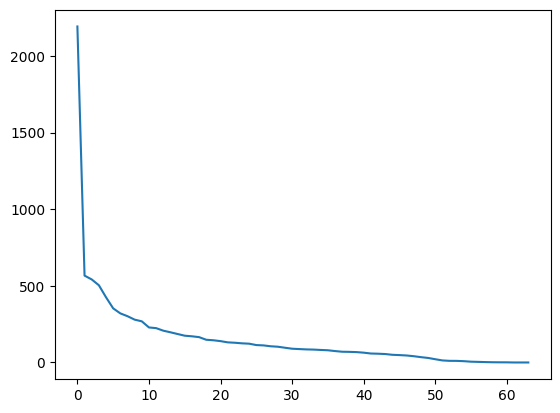

In [67]:
_, s, _ = np.linalg.svd(digits.data)
plt.plot(s)

In [68]:
mask0 = (y_train==0)
mask1 = (y_train==1)
mask = (mask0 + mask1)
X = X_train[mask]
Y = y_train[mask]


p=64

## Relevant learning rate 
alpha = 1/(2*np.linalg.norm(2*X.T.dot(X)))

def f(beta):
    """f(beta) = ||Xbeta-Y||^2"""
    return np.linalg.norm(X.dot(beta)-Y)**2

def df(beta):
    return 2*X.T.dot(X.dot(beta)-Y)

def deltaf(z,u):
    """returns directional derivative of f along u"""
    return df(z).dot(u)/np.linalg.norm(u)

In [69]:
ZGD, CGD = GD(f, df, epsilon = 100, alpha = alpha, z0 = np.zeros(p)) ## 1/6 would be optimal
np.sum(CGD)

213312

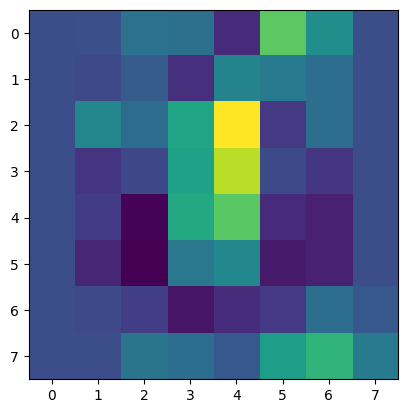

In [70]:
plt.imshow(ZGD[1000].reshape((8,8)))

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [02:04<00:00, 17.71s/it]


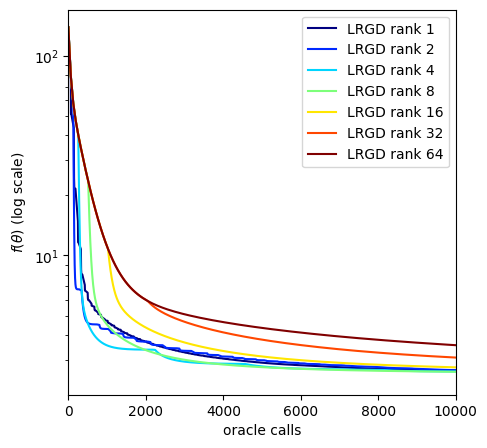

       LRGD rank 1  LRGD rank 2  LRGD rank 4  LRGD rank 8  LRGD rank 16  \
alpha        51485        19014        23524        33472         58304   

       LRGD rank 32  LRGD rank 64  
alpha        107424        213440  


In [71]:
experiment(f,deltaf, z0 = np.zeros(p),alpha = alpha, epsilon=100, ranks=[1,2,4,8,16,32,p],xmax=10000,savename="digitsbinaryregression.pdf")

In [72]:
X = X_train
Y = (y_train==0)+(y_train==6)+(y_train==8)+(y_train==9)

p=64
## Relevant learning rate 
alpha = 1/(2*np.linalg.norm(2*X.T.dot(X)))

def f(beta):
    """f(beta) = ||Xbeta-Y||^2"""
    return np.linalg.norm(X.dot(beta)-Y)**2

def df(beta):
    return 2*X.T.dot(X.dot(beta)-Y)

def deltaf(z,u):
    """returns directional derivative of f along u"""
    return df(z).dot(u)/np.linalg.norm(u)

alpha = 1/(2*np.linalg.norm(2*X.T.dot(X)))/2 ## 1/2L relevant cause the norm of hessian is upper bound on biggest singular value

## Define the corresponding functions
def f(beta):
    """f(beta) = 1/n sum_i \ell(xi.dot(beta),y_i)"""
    return np.sum([logistic_loss(X[i].dot(beta),Y[i]) for i in range(len(X))])
    
def df(beta):
    return -X.T.dot(Y - logistic_function(X.dot(beta)))

def deltaf(z,u):
    """returns directional derivative of f along u"""
    return df(z).dot(u)/np.linalg.norm(u)

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.23s/it]


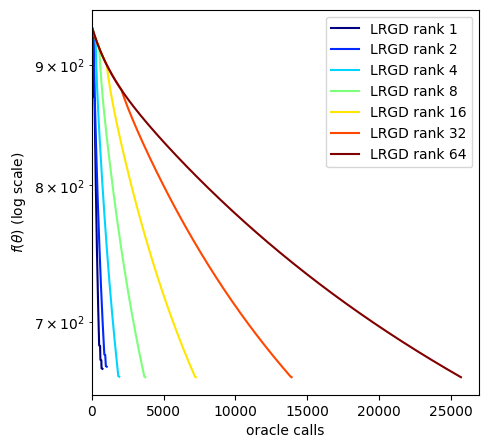

       LRGD rank 1  LRGD rank 2  LRGD rank 4  LRGD rank 8  LRGD rank 16  \
alpha          735         1034         1904         3720          7248   

       LRGD rank 32  LRGD rank 64  
alpha         13920         25728  


In [73]:
experiment(f,deltaf, z0 = np.zeros(p),alpha = alpha, epsilon=10000000, ranks=[1,2,4,8,16,32,p])

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [01:59<00:00, 19.85s/it]


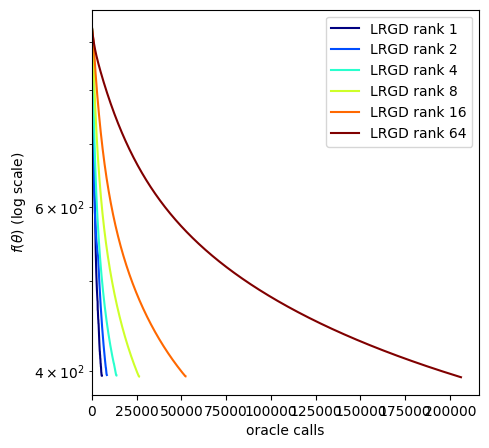

       LRGD rank 1  LRGD rank 2  LRGD rank 4  LRGD rank 8  LRGD rank 16  \
alpha         5504         8340        13680        26320         52288   

       LRGD rank 64  
alpha        206208  


In [74]:
#experiment(f,deltaf, z0 = np.zeros(p),alpha = alpha, epsilon=1000000, ranks=[1,2,4,8,16,p])

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [09:29<00:00, 81.31s/it]


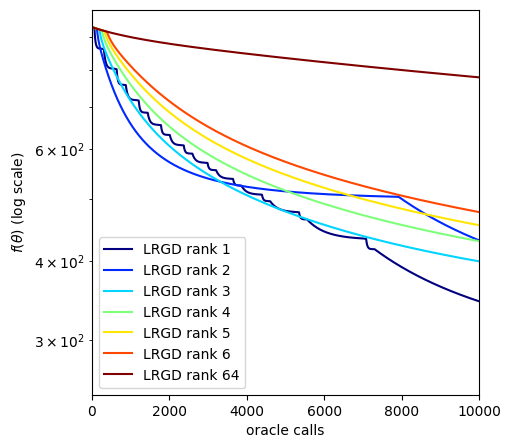

       LRGD rank 1  LRGD rank 2  LRGD rank 3  LRGD rank 4  LRGD rank 5  \
alpha        24167        49422        61897        81812       100804   

       LRGD rank 6  LRGD rank 64  
alpha       119162       1029504  


In [75]:
#BEAUTIFUL !! A garder même s'il prend du temps.

experiment(f,deltaf, z0 = np.zeros(p),alpha = alpha, epsilon=100000, ranks=[1,2,3,4,5,6,p],xmax=10000,savename="digitslogisticregression.pdf")